In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [2]:
os.chdir('E:\DataScience\datasets\SCMA2023')
nss = pd.read_csv('NSSO68.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nss.columns

Index(['Unnamed: 0', 'grp', 'Round_Centre', 'FSU_number', 'Round',
       'Schedule_Number', 'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [5]:
nss.head()

,Unnamed: 0,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.1e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.1e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.1e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.1e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.1e+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [6]:
list(nss)

['Unnamed: 0',
 'grp',
 'Round_Centre',
 'FSU_number',
 'Round',
 'Schedule_Number',
 'Sample',
 'Sector',
 'state',
 'State_Region',
 'District',
 'Stratum_Number',
 'Sub_Stratum',
 'Schedule_type',
 'Sub_Round',
 'Sub_Sample',
 'FOD_Sub_Region',
 'Hamlet_Group_Sub_Block',
 'Second',
 'X_Stage_Stratum',
 'HHS_No',
 'Level',
 'Filler',
 'hhdsz',
 'NIC_2008',
 'NCO_2004',
 'HH_type',
 'Religion',
 'Social_Group',
 'Whether_owns_any_land',
 'Type_of_land_owned',
 'Land_Owned',
 'Land_Leased_in',
 'Otherwise_possessed',
 'Land_Leased_out',
 'Land_Total_possessed',
 'During_July_June_Cultivated',
 'During_July_June_Irrigated',
 'NSS',
 'NSC',
 'MLT',
 'land_tt',
 'Cooking_code',
 'Lighting_code',
 'Dwelling_unit_code',
 'Regular_salary_earner',
 'Perform_Ceremony',
 'Meals_seved_to_non_hhld_members',
 'Possess_ration_card',
 'Type_of_ration_card',
 'MPCE_URP',
 'MPCE_MRP',
 'Person_Srl_No',
 'Relation',
 'Sex',
 'Age',
 'Marital_Status',
 'Education',
 'Days_Stayed_away',
 'No_of_Meals_per

In [7]:
col_names = ['Sector','state','State_Region','District','hhdsz','Religion','Social_Group',
'Whether_owns_any_land','Land_Total_possessed','land_tt','MPCE_URP','MPCE_MRP',
'Sex','Age','Marital_Status','Education','ricetotal_q','wheattotal_q','cerealstt_q',
'pulsestt_q','milkprott_q','edibletotal_q','emftt_q','ricetotal_v','wheattotal_v',
'cerealtot_v','pulsestt_v','milkprott_v','edibletotal_v','emftt_v','fv_tot','state_1','MLT']

In [79]:
nss1 = nss[col_names]

In [9]:
nss.shape, nss1.shape

((101662, 384), (101662, 33))

### Finding Missing Values and Missing Value Treatment

In [14]:
nss1.isnull().any().sum()

7

In [13]:
nss1.isna().any()

Sector                   False
state                    False
State_Region             False
District                 False
hhdsz                    False
Religion                  True
Social_Group              True
Whether_owns_any_land     True
Land_Total_possessed      True
land_tt                   True
MPCE_URP                 False
MPCE_MRP                 False
Sex                      False
Age                      False
Marital_Status            True
Education                 True
ricetotal_q              False
wheattotal_q             False
cerealstt_q              False
pulsestt_q               False
milkprott_q              False
edibletotal_q            False
emftt_q                  False
ricetotal_v              False
wheattotal_v             False
cerealtot_v              False
pulsestt_v               False
milkprott_v              False
edibletotal_v            False
emftt_v                  False
fv_tot                   False
state_1                  False
MLT     

In [16]:
nss1['MPCE_MRP'].isnull().any()

False

In [19]:
nss1['MPCE_MRP'][0]

3662.65

In [83]:
nss1['MPCE_MRP'][0] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
nss1['MPCE_MRP']

0             NaN
1         5624.51
2         3657.18
3         3260.37
4         2627.54
           ...   
101657     832.59
101658     862.13
101659     711.37
101660    1048.32
101661     834.03
Name: MPCE_MRP, Length: 101662, dtype: float64

In [22]:
nss1.shape

(101662, 33)

In [23]:
nss1.head()

,Sector,state,State_Region,District,hhdsz,Religion,Social_Group,Whether_owns_any_land,Land_Total_possessed,land_tt,...,ricetotal_v,wheattotal_v,cerealtot_v,pulsestt_v,milkprott_v,edibletotal_v,emftt_v,fv_tot,state_1,MLT
0,2,24,242,7,5,1.0,3.0,1.0,1.0,0.01,...,50.000000,144.000000,212.000000,76.4,355.68,150.000000,168.000,154.18,GUJ,738883.0
1,2,24,242,7,2,3.0,9.0,1.0,1.0,0.01,...,25.000000,90.000000,235.000000,122.5,331.86,100.000000,0.660,484.95,GUJ,738883.0
2,2,24,242,7,5,1.0,9.0,1.0,2.0,0.02,...,66.000000,120.000000,217.400000,64.0,312.16,152.000000,31.056,214.84,GUJ,738883.0
3,2,24,242,7,3,3.0,9.0,1.0,3.0,0.03,...,66.666667,116.666667,193.333333,127.0,217.80,93.333333,141.760,302.30,GUJ,1649600.0
4,2,24,242,7,4,1.0,9.0,1.0,2.0,0.02,...,31.250000,55.000000,146.750000,45.0,444.60,56.250000,1.100,148.00,GUJ,1649600.0


In [24]:
nss2 = nss1.dropna() # Removes the rows with any null value

In [25]:
nss2.shape

(101189, 33)

In [26]:
101662 - 101189

473

In [27]:
nss3 = nss1.dropna(axis=1) # Removes the columns with any null value

In [28]:
nss3.shape

(101662, 25)

In [39]:
nss4 = nss1.dropna(axis=1, thresh=.95)

In [40]:
nss4.shape

(101662, 33)

In [37]:
nss4 = nss1.dropna(axis=1, thresh= 50)

In [38]:
nss4.shape

(101662, 33)

### Imputation with mean value

In [41]:
nss1['MPCE_MRP'].mean()

2078.7356487738657

In [42]:
nss1['MPCE_MRP'].median()

1533.87

In [43]:
nss1['MPCE_MRP'].replace(np.nan,nss1['MPCE_MRP'].mean())

0         2078.735649
1         5624.510000
2         3657.180000
3         3260.370000
4         2627.540000
             ...     
101657     832.590000
101658     862.130000
101659     711.370000
101660    1048.320000
101661     834.030000
Name: MPCE_MRP, Length: 101662, dtype: float64

In [111]:
nss1['MPCE_MRP'][0] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


# knn 

In [118]:
nss1['MPCE_MRP'][0] = np.nan
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=20)
columns_for_imputation = ['MPCE_MRP']
data_subset = nss1[columns_for_imputation]
data_subset_imputed = pd.DataFrame(imputer_knn.fit_transform(data_subset), columns=data_subset.columns)
nss1['mpce_imputed'] = data_subset_imputed['MPCE_MRP']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [119]:
nss1['mpce_imputed']

0         1876.319692
1         4421.425000
2         3657.180000
3         3260.370000
4         2627.540000
             ...     
101657     832.590000
101658     862.130000
101659     711.370000
101660    1048.320000
101661     834.030000
Name: mpce_imputed, Length: 101662, dtype: float64

In [45]:
nss1[nss1['MPCE_MRP'].isnull()]

,Sector,state,State_Region,District,hhdsz,Religion,Social_Group,Whether_owns_any_land,Land_Total_possessed,land_tt,...,ricetotal_v,wheattotal_v,cerealtot_v,pulsestt_v,milkprott_v,edibletotal_v,emftt_v,fv_tot,state_1,MLT
0,2,24,242,7,5,1.0,3.0,1.0,1.0,0.01,...,50.0,144.0,212.0,76.4,355.68,150.0,168.0,154.18,GUJ,738883.0


In [ ]:
sector = 2
state = 24
district = 7
religion = 1.0
socil_group = 3

In [120]:
nss1['MPCE_MRP'][0] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
nss_new = nss1[(nss1['Sector'] == 2) & (nss1['State_Region'] == 242) & (nss1['Religion']==1.0)
              &(nss1['Social_Group'] == 3.0) & (nss1['District'] == 7) & (nss1['hhdsz']==5)]

In [55]:
nss_new['MPCE_MRP'].mean()

2642.6988235294116

In [56]:
nss_new = nss1[(nss1['Sector'] == 2) & (nss1['State_Region'] == 242) & (nss1['Religion']==1.0)
              &(nss1['Social_Group'] == 3.0) & (nss1['District'] == 7) & (nss1['hhdsz']==5) 
               & (nss1['Whether_owns_any_land'] == 1.0)]

In [57]:
nss_new['MPCE_MRP'].mean()

2909.5028571428566

#### Actual value of MPCE_MRP was 3662
#### As we started taking mean of more representative group, the mean was approaching towards actual value of 3662

In [60]:
nss1['MPCE_MRP'].bfill()

0         5624.51
1         5624.51
2         3657.18
3         3260.37
4         2627.54
           ...   
101657     832.59
101658     862.13
101659     711.37
101660    1048.32
101661     834.03
Name: MPCE_MRP, Length: 101662, dtype: float64

In [61]:
nss1['MPCE_MRP'][3] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
nss1['MPCE_MRP']

0             NaN
1         5624.51
2         3657.18
3             NaN
4         2627.54
           ...   
101657     832.59
101658     862.13
101659     711.37
101660    1048.32
101661     834.03
Name: MPCE_MRP, Length: 101662, dtype: float64

In [63]:
nss1['MPCE_MRP'].ffill()

0             NaN
1         5624.51
2         3657.18
3         3657.18
4         2627.54
           ...   
101657     832.59
101658     862.13
101659     711.37
101660    1048.32
101661     834.03
Name: MPCE_MRP, Length: 101662, dtype: float64

### Outliers identification and treatment

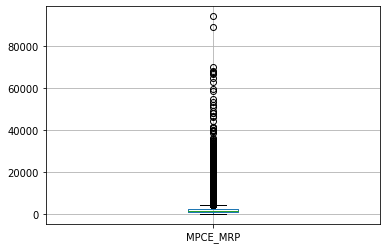

In [65]:
nss1.boxplot(column='MPCE_MRP');

In [66]:
nss2 = nss1[nss1['MPCE_MRP'] < 80000]

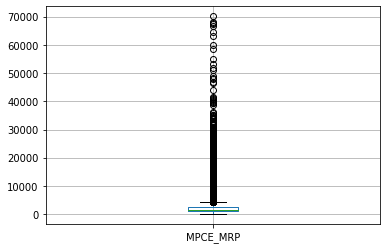

In [68]:
nss2.boxplot(column='MPCE_MRP');

In [71]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 -Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [72]:
remove_outlier(nss1['MPCE_MRP'])

(-965.9750000000001, 4421.425)

In [73]:
lowincome,upincome = remove_outlier(nss1['MPCE_MRP'])

In [74]:
lowincome,upincome

(-965.9750000000001, 4421.425)

In [80]:
nss1['MPCE_MRP'] = np.where(nss1['MPCE_MRP'] > upincome,upincome,nss1['MPCE_MRP'])
nss1['MPCE_MRP'] = np.where(nss1['MPCE_MRP'] < lowincome,lowincome,nss1['MPCE_MRP'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


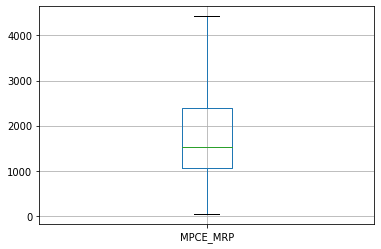

In [81]:
nss1.boxplot(column='MPCE_MRP');

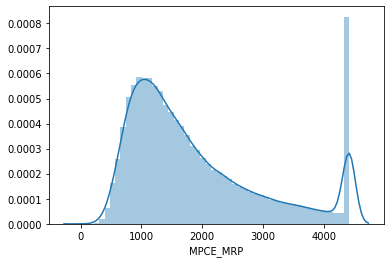

In [82]:
sns.distplot(nss1['MPCE_MRP']);

In [78]:
nss1['MPCE_MRP'].isnull()

0          True
1         False
2         False
3          True
4         False
          ...  
101657    False
101658    False
101659    False
101660    False
101661    False
Name: MPCE_MRP, Length: 101662, dtype: bool

### Survey Data, applying weights

#### What is the average consumption of rice (quanties) among male and female?

In [89]:
nss1.columns

Index(['Sector', 'state', 'State_Region', 'District', 'hhdsz', 'Religion',
       'Social_Group', 'Whether_owns_any_land', 'Land_Total_possessed',
       'land_tt', 'MPCE_URP', 'MPCE_MRP', 'Sex', 'Age', 'Marital_Status',
       'Education', 'ricetotal_q', 'wheattotal_q', 'cerealstt_q', 'pulsestt_q',
       'milkprott_q', 'edibletotal_q', 'emftt_q', 'ricetotal_v',
       'wheattotal_v', 'cerealtot_v', 'pulsestt_v', 'milkprott_v',
       'edibletotal_v', 'emftt_v', 'fv_tot', 'state_1', 'MLT'],
      dtype='object')

In [90]:
nss1['Sex'].value_counts() #1- Male, 2-Female

1    89908
2    11754
Name: Sex, dtype: int64

In [91]:
nss1.groupby('Sex')['ricetotal_q'].mean() # 

Sex
1    6.539024
2    7.040060
Name: ricetotal_q, dtype: float64

In [92]:
nss1['ricetotal_q'].mean()

6.596953106952834

In [94]:
(nss1['ricetotal_q']*nss1['MLT']).sum()/nss1['MLT'].sum()

5.795658646288507

In [104]:
# Define a function to compute the weighted mean
def weighted_mean(series, weights):
    return (series*weights).sum() / weights.sum()
#Define a function to apply the weighted mean to a grouped data
def apply_weighted_mean(group):
    return pd.Series({'Weighted_MPCE':weighted_mean(group['ricetotal_q'],group['MLT'])})
# Group by the desired colums
grouped = nss1.groupby('Sex')

#Apply the weighted mean function to each group
weighted_mean = grouped.apply(apply_weighted_mean) 

In [105]:
weighted_mean

,Weighted_MPCE
Sex,
1,5.693113
2,6.549755


In [ ]:
        Withoug weight        With weight
Male    6.539024               5.69
Female    7.040060             6.5